In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt

In [12]:
# import zipfile
# import os

# zip_path = "/content/cats_and_dogs_filtered.zip"
# extract_path = "/content/cats_and_dogs_filtered_db"

# # Extract ZIP file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("Extraction completed")

In [13]:
base_dir = r"/content/cats_and_dogs_filtered_db"
train_dir = f"{base_dir}/cats_and_dogs_filtered/train"
val_dir = f"{base_dir}/cats_and_dogs_filtered/validation"

In [14]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
base_model.trainable = False

for layer in base_model.layers[-4:]:
    layer.trainable = True

In [17]:
model = Sequential([
    base_model,
    Flatten(),                           # flatten
    Dense(256, activation='relu'),       # fully connected
    Dropout(0.3),                        # dropout
    Dense(1, activation='sigmoid')       # output layer for binary
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 13,502,465 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [19]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 331ms/step - accuracy: 0.6997 - loss: 0.5763 - val_accuracy: 0.9370 - val_loss: 0.1621
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.9709 - loss: 0.0948 - val_accuracy: 0.8990 - val_loss: 0.2543
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9737 - loss: 0.0686 - val_accuracy: 0.9380 - val_loss: 0.2027
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.9934 - loss: 0.0174 - val_accuracy: 0.9600 - val_loss: 0.1281
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9610 - val_loss: 0.1241


In [31]:
test_loss, test_acc = model.evaluate(val_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9601 - loss: 0.1549
Test Accuracy: 0.9680


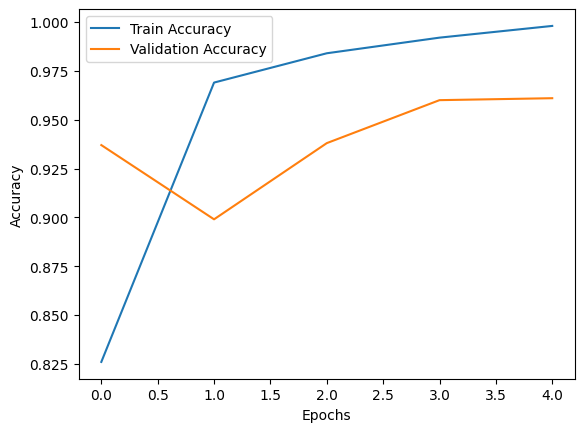

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



---



### Optimizer: SGD

In [22]:
model2 = Sequential([
    base_model,
    Flatten(),                           # flatten
    Dense(256, activation='relu'),       # fully connected
    Dropout(0.3),                        # dropout
    Dense(1, activation='sigmoid')       # output layer for binary
])

model2.compile(optimizer=SGD(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 13,502,465 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [24]:
history2 = model2.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 336ms/step - accuracy: 0.6228 - loss: 0.6543 - val_accuracy: 0.9120 - val_loss: 0.3703
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step - accuracy: 0.9188 - loss: 0.3308 - val_accuracy: 0.9440 - val_loss: 0.2711
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.9542 - loss: 0.2346 - val_accuracy: 0.9490 - val_loss: 0.2250
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - accuracy: 0.9676 - loss: 0.1783 - val_accuracy: 0.9530 - val_loss: 0.1980
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9771 - loss: 0.1548 - val_accuracy: 0.9510 - val_loss: 0.1803


In [32]:
test_loss, test_acc = model2.evaluate(val_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9510 - loss: 0.1650
Test Accuracy: 0.9520


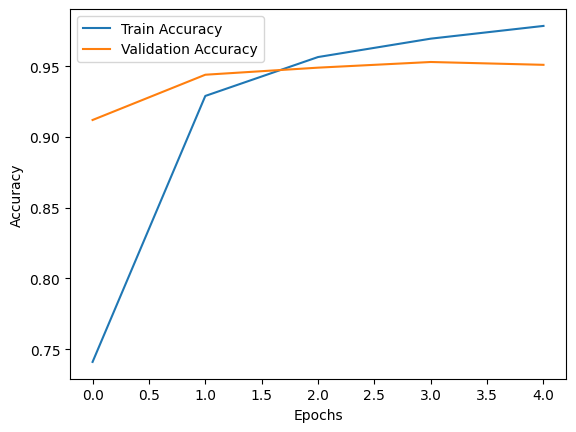

In [26]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



---



### Optimizer: RMSProp

In [27]:
model3 = Sequential([
    base_model,
    Flatten(),                           # flatten
    Dense(256, activation='relu'),       # fully connected
    Dropout(0.3),                        # dropout
    Dense(1, activation='sigmoid')       # output layer for binary
])

model3.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history3 = model3.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 335ms/step - accuracy: 0.8779 - loss: 0.3796 - val_accuracy: 0.9570 - val_loss: 0.1108
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.9926 - loss: 0.0354 - val_accuracy: 0.9580 - val_loss: 0.1201
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9978 - loss: 0.0138 - val_accuracy: 0.9610 - val_loss: 0.1316
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.9992 - loss: 0.0049 - val_accuracy: 0.9610 - val_loss: 0.1378
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 0.9590 - val_loss: 0.1582


In [33]:
test_loss, test_acc = model3.evaluate(val_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9672 - loss: 0.1190
Test Accuracy: 0.9590


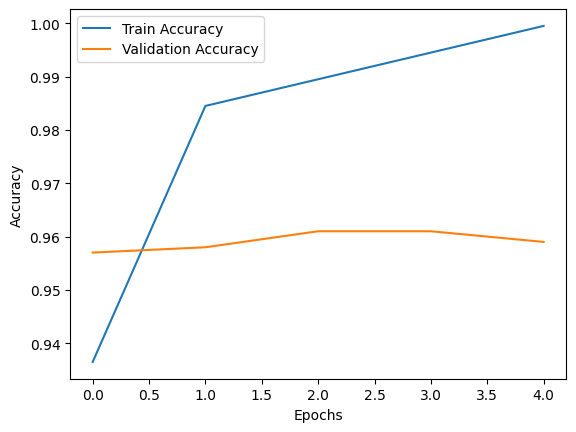

In [30]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()